In [3]:
import numpy as np
import pandas as pd
from scipy import signal
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev-1hr-full.csv', 
                header = 0, index_col = 0)
data.index = data.index.map(lambda x: x[:-3])
data.index = pd.to_datetime(data.index)
data.head()

,dataid,car1,grid
localminute,,,
2017-01-01,26,0.005000,1.788783
2017-01-01,5786,0.000000,1.244300
2017-01-01,114,0.001267,0.552000
2017-01-01,8046,0.000000,0.763217
2017-01-01,379,0.005000,1.167650


In [90]:
ev_signals = pd.DataFrame(index = data[data['dataid'] == 26].index)
grid_signals = pd.DataFrame(index = data[data['dataid'] == 26].index)
for i in np.unique(data['dataid']):
    if len(data[data['dataid'] == i]['car1']) == len(ev_signals.index):
        ev_signals[str(i)] = data[data['dataid'] == i]['car1']
        grid_signals[str(i)] = data[data['dataid'] == i]['grid']
    
ev_signals = ev_signals.T
grid_signals = grid_signals.T
grid_signals.head()

localminute,2017-01-01 00:00:00,2017-01-01 01:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,2017-01-01 06:00:00,2017-01-01 07:00:00,2017-01-01 08:00:00,2017-01-01 09:00:00,...,2017-12-31 08:00:00,2017-12-31 09:00:00,2017-12-31 10:00:00,2017-12-31 11:00:00,2017-12-31 12:00:00,2017-12-31 13:00:00,2017-12-31 14:00:00,2017-12-31 15:00:00,2017-12-31 16:00:00,2017-12-31 17:00:00
26,1.788783,1.223650,0.667667,0.477950,0.414017,0.355567,0.381233,0.482483,0.413217,0.388917,...,1.010717,1.153483,0.893983,0.991250,1.003733,0.689017,0.675500,1.000450,1.397933,2.535317
114,0.552000,0.394583,0.321000,0.305867,3.525317,0.908350,0.301467,0.288583,0.281650,-0.517283,...,0.749050,0.819400,1.027983,1.251217,3.381050,1.182733,1.476850,1.612417,1.764600,2.422233
370,0.862550,4.089967,0.767333,0.498483,0.489683,0.493667,0.495950,0.481117,0.351017,0.159617,...,0.715533,0.727317,0.683617,0.761350,1.199417,1.199600,1.342850,0.953150,0.771617,0.620600
379,1.167650,1.002167,1.099783,0.554567,0.552383,0.548350,0.504433,0.521533,0.071883,-1.638117,...,2.193250,1.224717,1.078600,2.715417,1.583767,1.856400,2.227933,0.990883,1.410900,1.607333
1169,0.550783,0.432433,0.388200,0.395217,0.394033,0.387500,0.377900,0.537700,0.481383,-0.648383,...,0.648833,0.320417,0.149867,0.143050,0.218950,0.943100,0.353683,0.475433,0.573167,0.586550


In [6]:
week = 7*24

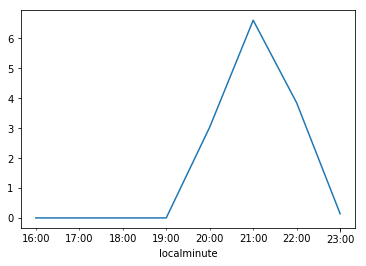

In [7]:
ev_signals.iloc[5][40:48].plot()
plt.show()

In [11]:
def get_signatures(power_series,min_off_duration = 0, min_on_duration = 3):
    
    signatures = []
    current_signal = []
    starts = []
    peak_times = []
    off_duration = 0
    
    for i in range(1,power_series.size):
        
        if power_series[i] > 1:
            if len(current_signal) == 0:
               current_signal.append(0)
            current_signal.append(power_series[i])
            off_duration = 0
        else:
            off_duration += 1
            if off_duration >= min_off_duration and len(current_signal) > min_on_duration:
                current_signal.append(0)
                signatures.append(current_signal)
                starts.append(power_series.index[i-len(current_signal)])
                peak_times.extend(power_series.index[i-len(current_signal):i])
                current_signal = []
            
    return signatures, starts, pd.to_datetime(peak_times)

In [12]:
signatures, signal_starts, signal_times = get_signatures(ev_signals.iloc[12])
signatures[0]

[0, 1.5386333333333333, 3.1852166666666668, 1.7550166666666669, 1.55575, 0]

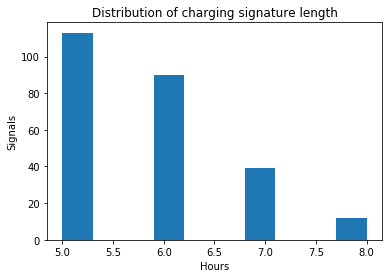

In [13]:
plt.hist([len(s) for s in signatures])
plt.title("Distribution of charging signature length")
plt.xlabel("Hours")
plt.ylabel("Signals")
plt.show()

0.0
0.0
0.0
1.0
1.0
1.0
2.0
2.0


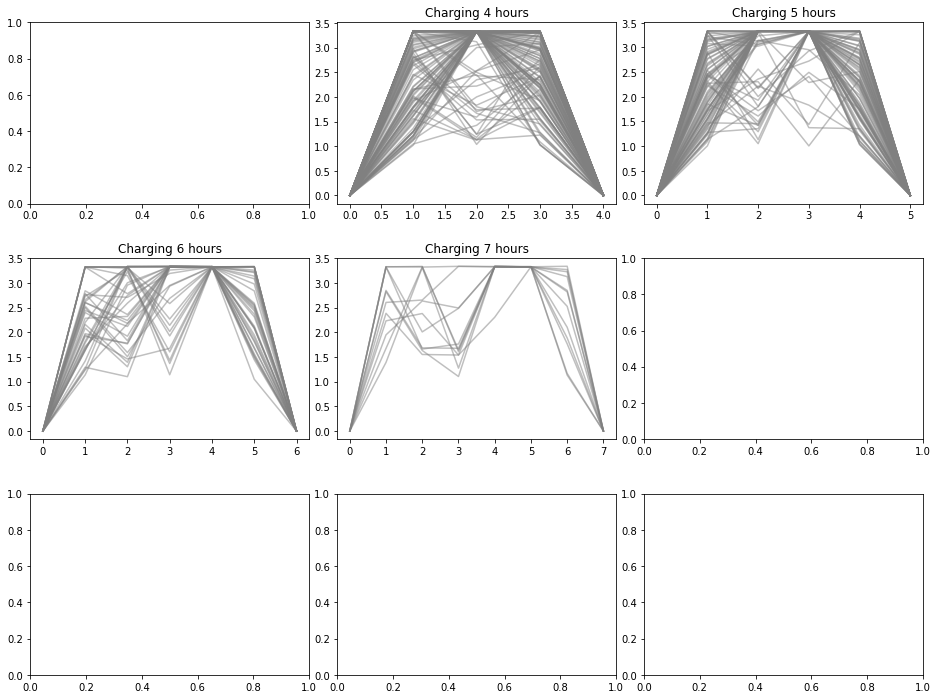

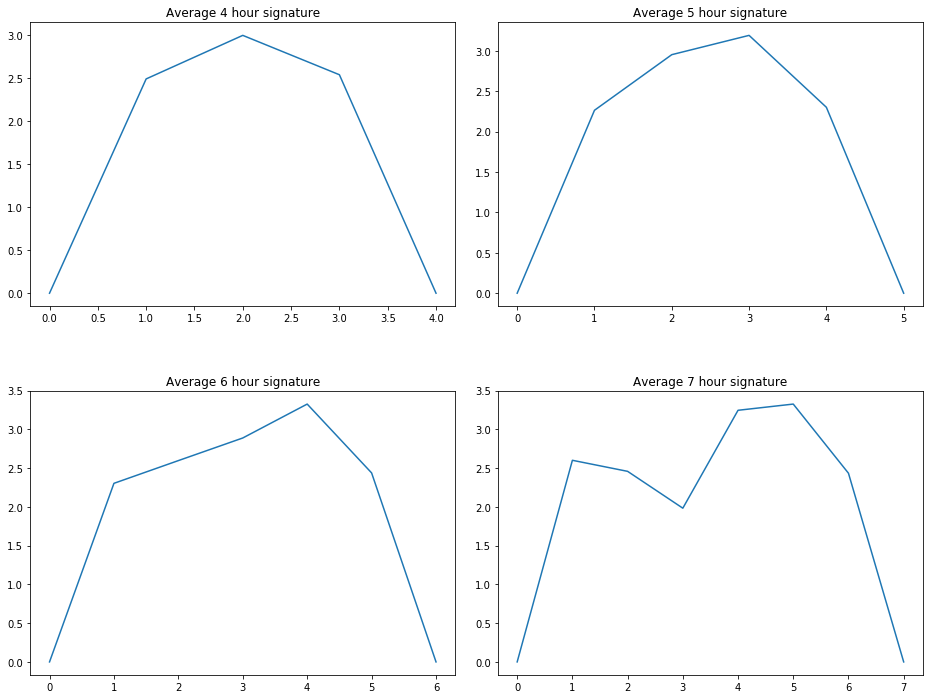

In [24]:
tot = np.zeros(10)
fig, axarr = plt.subplots(3,3,sharex=False)
plt.subplots_adjust(hspace=0.3,wspace=0.1)
fig.set_size_inches(16,12)
totals = [np.zeros(i) for i in range(12)]
counts = np.zeros(12)

for i in range(5,len(signatures)):
    n = len(signatures[i])
    axarr[int(np.floor((n-4)/3)),int((n-4)%3)].plot(signatures[i],color='grey',alpha=0.5)
    axarr[int(np.floor((n-4)/3)),int((n-4)%3)].set_title("Charging "+ str(n-1) + " hours")
    for j in range(n):
        totals[n][j] += signatures[i][j]
    counts[n] += 1

plt.show()

for i in range(len(counts)):
    if counts[i] != 0:
        totals[i] /= counts[i]

fig,axarr = plt.subplots(2,2,sharex=False)
plt.subplots_adjust(hspace=0.3,wspace=0.1)
fig.set_size_inches(16,12)

for i in range(5,9):
    axarr[int(np.floor((i-5)/2)),int((i-5)%2)].plot(totals[i])
    axarr[int(np.floor((i-5)/2)),int((i-5)%2)].set_title("Average " + str(i-1) + " hour signature")
plt.show()

I don't think these averages capture the charging signatures very well. Perhaps at higher resolutions the results would be better.

In [92]:
def find_signals(data, templates, threshold=0.4, mode='same', interval = 2):
    #Finds the events corresponding to a cross correlation between the data and at least one template of above threshold.

    timeline = pd.DataFrame(np.zeros(data.shape[0]),index = data.index)
    for template in templates:
        
        if sum(template) == 0:
            continue
            
        xcorr = signal.correlate(data, template, mode=mode)
        xcorr /= xcorr.max()

        events = []
        i=0

        while i < len(xcorr):
            if xcorr[i] >= threshold and np.sum(timeline.loc[timeline.index[i-interval]:timeline.index[i+interval]])[0] == 0:
                timeline.loc[data.index[i]] += 1
                while xcorr[i] >= threshold:
                    i += 1
            i+=1
    
    signals_discovered = timeline.where(timeline > 0).dropna().index
    
    return signals_discovered

def filter_score(signal_times,signals_hat,n_signals):
    #True positives
    tp = np.where(np.in1d(signals_hat,signal_times))[0].shape[0]
    #False positives
    fp = np.where(np.in1d(signals_hat,signal_times,invert=True))[0].shape[0]
    #Precision
    precision = tp/(tp+fp)
    #Recall
    recall = tp/n_signals
    #F1-measure
    f1 = (2*precision*recall) / (precision + recall)
    #print('Precision: {}\nRecall: {}\nF1-score: {}'.format(precision,recall,f1))
    
    return precision,recall,f1



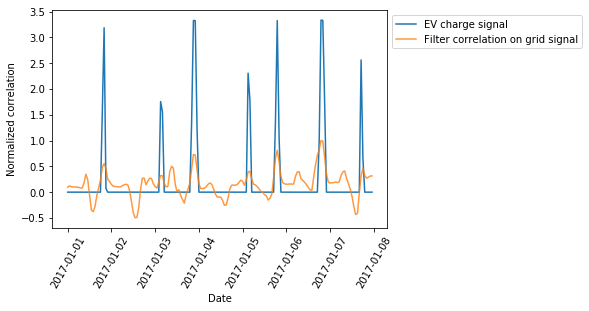

In [93]:
signals = find_signals(grid_signals.iloc[12], [totals[5]],threshold=0.4)
full_xcorr = signal.correlate(grid_signals.iloc[12], totals[5], mode='same')

plt.plot(ev_signals.iloc[12][:week])
plt.plot(ev_signals.iloc[12][:week].index,full_xcorr[:week]/full_xcorr[:week].max(), alpha=0.8)
plt.ylabel("Normalized correlation")
plt.xlabel("Date")
plt.legend(["EV charge signal","Filter correlation on grid signal"],bbox_to_anchor=(1, 1))
plt.xticks(rotation=60)
#for line in signals[:8]:
#    plt.axvline(line, linestyle='--',alpha=0.9,color='grey')

plt.show()


In [106]:
precisions = []
recalls = []
f1s = []
threshold_range = np.linspace(0.3,0.8,20)

for i in threshold_range:
    s = find_signals(grid_signals.iloc[12], [totals[i] for i in range(len(totals))],threshold=i,interval=3)
    p,r,f1 = filter_score(signal_times,s,len(signal_starts))
    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)

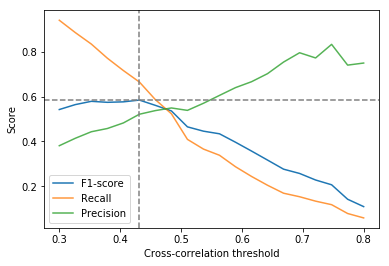

Max F1-score: 0.5847750865051903


In [107]:

plt.plot(threshold_range, f1s)
plt.plot(threshold_range, recalls, alpha=0.8)
plt.plot(threshold_range, precisions, alpha=0.8)
plt.legend(["F1-score","Recall","Precision"])
plt.axhline(np.max(f1s), color='grey', linestyle='--')
plt.axvline(threshold_range[np.argmax(f1s)], color='grey', linestyle='--')
plt.xlabel("Cross-correlation threshold")
plt.ylabel("Score")
plt.show()
print("Max F1-score: {}".format(np.max(f1s)))
#plt.plot(np.ones(len(recalls))-recalls,precisions)
#plt.show()

With such low training scores, there is little point in pursuing 1 hour resolution filters any further.